<a href="https://colab.research.google.com/github/PaulToronto/TensorFlow_Tutorials/blob/main/1_Quickstart_for_beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quickstart for beginners

- https://tinyurl.com/45tnnvhj

## Imports

In [1]:
import matplotlib.pyplot as plt

## Set up TensorFlow

In [2]:
import tensorflow as tf

In [3]:
tf.__version__

'2.17.0'

## Load a dataset with train/test split

In [4]:
mnist = tf.keras.datasets.mnist
mnist

<module 'keras.api.datasets.mnist' from '/usr/local/lib/python3.10/dist-packages/keras/api/datasets/mnist/__init__.py'>

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

### Visualize `mnist` digits

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

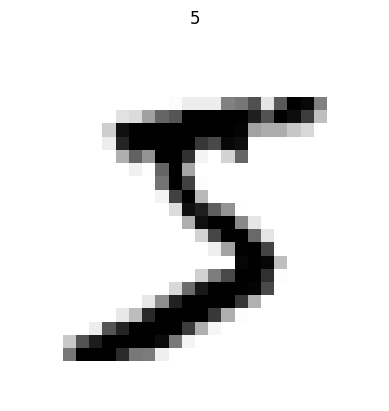

In [9]:
def plot_digit(image_data, label_data):
    image = image_data
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(str(label_data))

plot_digit(X_train[0], y_train[0])

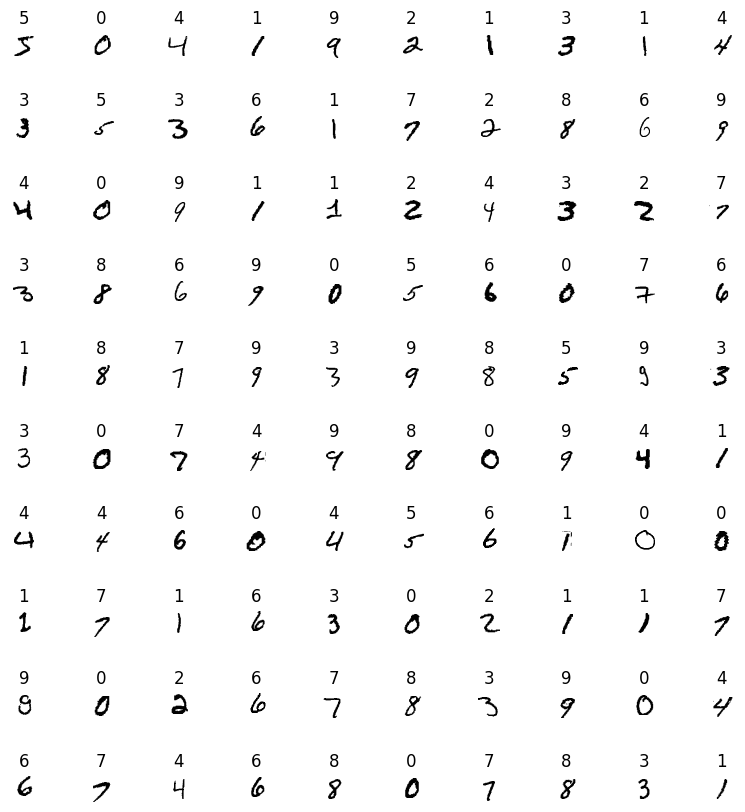

In [10]:
plt.figure(figsize=(10, 10))
for index, image_data in enumerate(X_train[:100]):
    plt.subplot(10, 10, index+1)
    plot_digit(image_data, y_train[index])

plt.subplots_adjust(wspace=0, hspace=2)

## Build a machine learning model

- one way is to use a `tf.keras.Sequential` model
- a Sequential model is useful for stacking layers, where each layer has on input tensor and one output tensor
- this model uses `Flatten`, `Dense` and `Dropout` layers

In [11]:
model = tf.keras.models.Sequential([

    # input layer has a node for each feature, 784 nodes
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),

    # hidden layer
    tf.keras.layers.Dense(128, activation='relu'),

    # dropout layer: used to prevent overfitting
    #. This means that each time the model is
    #. updated (each batch during training),
    #. 20% of the nodes in the preceding layer
    #. (the dense layer with 128 neurons) will be
    #. “dropped out” or set to zero. This introduces
    #. noise into the training process and
    #. helps in regularization.
    tf.keras.layers.Dropout(0.2),

    # output layer has a node for each class
    tf.keras.layers.Dense(10)
])

model

<Sequential name=sequential, built=True>

The model returns a vector of logits or log-odds scores, one for each class.

In [12]:
predictions = model(X_train[:1])
predictions

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-0.5037831 , -0.47456226, -0.11784218,  0.7525501 ,  0.31957453,
        -0.31060287,  0.1556432 ,  0.12934664, -0.38339236, -0.08829766]],
      dtype=float32)>

In [13]:
predictions = predictions.numpy()
predictions

array([[-0.5037831 , -0.47456226, -0.11784218,  0.7525501 ,  0.31957453,
        -0.31060287,  0.1556432 ,  0.12934664, -0.38339236, -0.08829766]],
      dtype=float32)

In [14]:
# this is similar to the output of `model(X_train[:1])`
model.predict(X_train[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


array([[-0.5037831 , -0.47456226, -0.11784218,  0.7525501 ,  0.31957453,
        -0.31060287,  0.1556432 ,  0.12934664, -0.38339236, -0.08829766]],
      dtype=float32)

The `tf.nn.softmax` function coverts these logits into *probabilities* for each class. Note, that it is possible to use this as the activation function in the output layer. This makes the output more directly interpretable, but this approach is discouraged as it's impossible to provide an exact numerically stable loss calculation when using a `softmax` output.

In [15]:
# note, the model hasn't been trained yet so this is garbage output
tf.nn.softmax(predictions).numpy()

array([[0.05894618, 0.06069404, 0.08670969, 0.20704952, 0.13428743,
        0.07150768, 0.1139832 , 0.1110249 , 0.0664876 , 0.08930971]],
      dtype=float32)

## Compile a model

- for this we need an optimizer and a loss function
- here we define a loss function using `losses.SparseCategoricalCrossentropy`
    - this loss function takes a vector of ground truth values and a vector of logis and returns a scalar loss for each example
    - this loss is equal to the negative log probablity of the true class
    - the loss is zero if the model is sure of the correct class

In [16]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn

In [17]:
# note, the model hasn't been trained yet
loss_fn(y_train[:1], predictions).numpy()

2.6379504

In [18]:
# the untrained model gives close to random (1/10) for each class
#. so the initial loss should be close to
-tf.math.log(1/10).numpy()

2.3025851

In [19]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

## Train and evaluate your model

In [20]:
# train
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8606 - loss: 0.4740
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9547 - loss: 0.1511
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.9652 - loss: 0.1126
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9743 - loss: 0.0843
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - accuracy: 0.9793 - loss: 0.0693


In [21]:
# evaluate
#. returns the loss value and the metrics value in a list
model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9794 - loss: 0.0681


[0.06812180578708649, 0.9793999791145325]

In [22]:
# each `prediction` or row is a vector of logits
predictions = model.predict(X_test)

# each row is a list of probabilities, one for each class
#. each row has a sum of 1
probs = tf.nn.softmax(predictions)

# manual calculation of accuracy
#. this matches the value we got above with the `.evaluate()` method
(probs.numpy().argmax(axis=1)  == y_test).sum() / len(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


0.9794

## Setting up your model so that it returns a probability

- Recall, this is not recommended

In [23]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [24]:
# loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# from_logits is False in this one
loss_fn_new = tf.keras.losses.SparseCategoricalCrossentropy()

probability_model.compile(optimizer='adam',
                    loss=loss_fn_new,
                    metrics=['accuracy'])

In [25]:
# same results as before
probability_model.evaluate(X_test, y_test, verbose=2)

313/313 - 1s - 2ms/step - accuracy: 0.9794 - loss: 0.0000e+00


[0.0, 0.0, 0.9793999791145325, 0.9793999791145325]

In [26]:
# since we are using `Softmax` in the output layer,
#. the manual calculation changes

# each `prediction` or row is a vector of probabilities
predictions2 = probability_model.predict(X_test)

# don't need this anymore since we already have probabilities
#probs = tf.nn.softmax(predictions)

# manual calculation of accuracy
#. this matches the value we got above with the `.evaluate()` method
(predictions2.argmax(axis=1) == y_test).sum() / len(y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


0.9794